In [1]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt

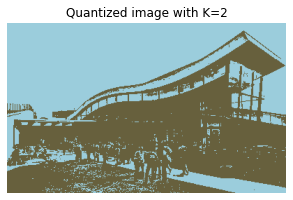

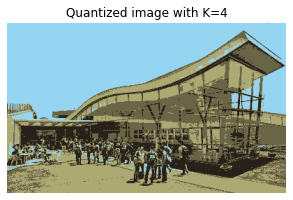

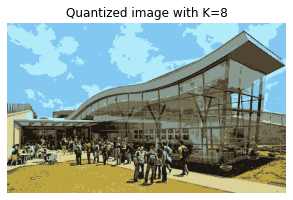

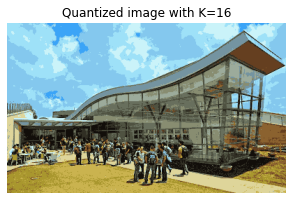

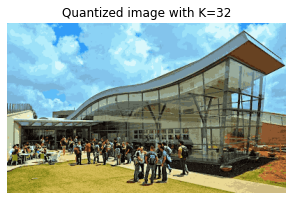

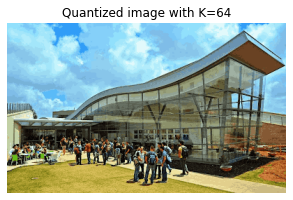

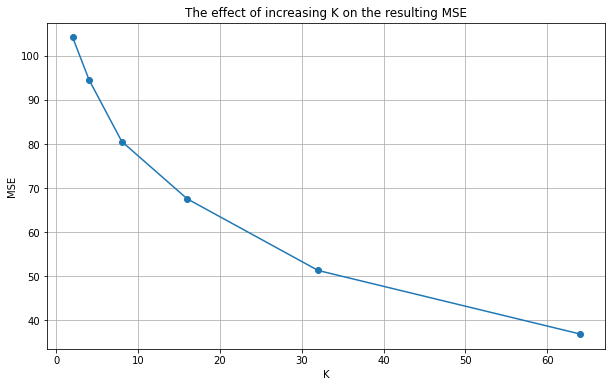

In [2]:
def load_image(img_path):
    img = Image.open(img_path)
    return np.array(img)

def reshape_image(img):
    img = img.reshape((-1,3))
    return img

def apply_kmeans(img, K):
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(img)
    return kmeans

def replace_with_centroid(img, kmeans):
    img_kmeans = kmeans.cluster_centers_[kmeans.labels_]
    img_kmeans = np.clip(img_kmeans.astype('uint8'), 0, 255)
    return img_kmeans

def plot_quantized_image(img, K):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title(f'Quantized image with K={K}')
    plt.imshow(img.reshape(original_shape))
    plt.show()

def calculate_mse(original, quantized):
    return np.mean((original - quantized)**2)

# Load image
img_path = 'RuppinLibrary.jpg'
original_img = load_image(img_path)
original_shape = original_img.shape

# Save pixels in a matrix X
X = reshape_image(original_img)

K_values = [2, 4, 8, 16, 32, 64]
mse_values = []

for K in K_values:
    # Apply KMeans
    kmeans = apply_kmeans(X, K)
    
    # Replace each pixel with the centroid
    quantized_img = replace_with_centroid(X, kmeans)
    
    # Display the quantized image
    plot_quantized_image(quantized_img, K)
    
    # Calculate MSE
    mse = calculate_mse(original_img, quantized_img.reshape(original_shape))
    mse_values.append(mse)

# Plot MSE values
plt.figure(figsize=(10,6))
plt.plot(K_values, mse_values, 'o-')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('The effect of increasing K on the resulting MSE')
plt.grid(True)
plt.show()